## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით


In [3]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

file_path = "LoanStatus.csv" 
df = pd.read_csv(file_path)



In [4]:
# მთლიანი ცხრილისთვის
print("Descriptive statistics:")
print(df.describe()) 

#ცალკეული ველებისთვის 
print("\n", 'STD of LoanAmount:  ', df['LoanAmount'].std())
print('Median of Loan_Amount_Term median:  ',df['Loan_Amount_Term'].median())
print('Minimum Loan_Amount_Term:  ',df['Loan_Amount_Term'].min())
print('Maximum Loan_Amount_Term:  ',df['Loan_Amount_Term'].max())
print('Mean of ApplicantIncome:  ',df['ApplicantIncome'].mean())
print('The mode of the Credit_History:  ',df['Credit_History'].mode())


Descriptive statistics:
       ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000  592.000000         600.00000      564.000000
mean       5403.459283  146.412162         342.00000        0.842199
std        6109.041673   85.587325          65.12041        0.364878
min         150.000000    9.000000          12.00000        0.000000
25%        2877.500000  100.000000         360.00000        1.000000
50%        3812.500000  128.000000         360.00000        1.000000
75%        5795.000000  168.000000         360.00000        1.000000
max       81000.000000  700.000000         480.00000        1.000000

 STD of LoanAmount:   85.58732523570545
Median of Loan_Amount_Term median:   360.0
Minimum Loan_Amount_Term:   12.0
Maximum Loan_Amount_Term:   480.0
Mean of ApplicantIncome:   5403.459283387622
The mode of the Credit_History:   0    1.0
Name: Credit_History, dtype: float64


In [5]:
print("\nNumber of blank values in each column:")
print(df.isnull().sum())


Number of blank values in each column:
Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [7]:
loan_status_counts = df['Loan_Status'].value_counts()
total = len(df)
probability_loan_approved = loan_status_counts['Y'] / total
print("Probability of getting a loan based on Loan_Status:", probability_loan_approved)

Probability of getting a loan based on Loan_Status: 0.6872964169381107


In [8]:
good_credit_approved = df[(df['Credit_History'] == 1) & (df['Loan_Status'] == 'Y')]
total_good_credit = len(df[df['Credit_History'] == 1])

probability_loan_with_good_credit = len(good_credit_approved) / total_good_credit
print("Probability of getting a loan with good credit history:", probability_loan_with_good_credit)


Probability of getting a loan with good credit history: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

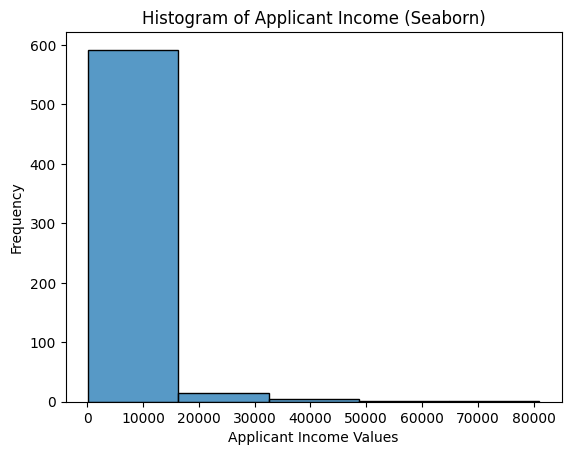

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.histplot(data=df, x='ApplicantIncome', bins=5) 
plt.title('Histogram of Applicant Income (Seaborn)')  
plt.xlabel('Applicant Income Values')  
plt.ylabel('Frequency')  
plt.show()



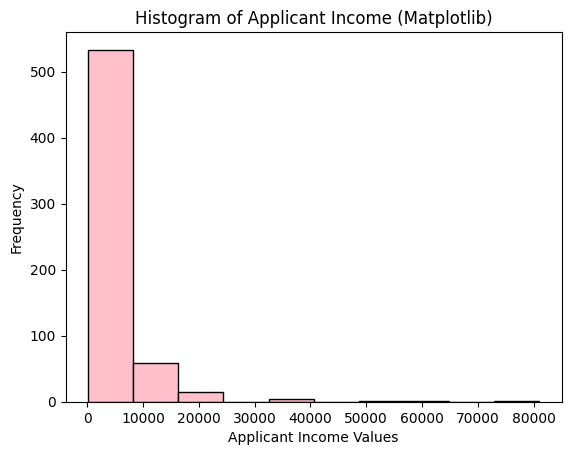

In [11]:
plt.hist(df['ApplicantIncome'], bins=10, color='pink', edgecolor='black') 
plt.title('Histogram of Applicant Income (Matplotlib)')  
plt.xlabel('Applicant Income Values') 
plt.ylabel('Frequency') 
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [9]:
from scipy.stats import norm

x = 2000  
mean_val = df['ApplicantIncome'].mean() 
std_dev_val = df['ApplicantIncome'].std() 

cumulative_probability = norm.cdf(x, mean_val, std_dev_val)
result = cumulative_probability * 100


print(f"The cumulative probability that a customer has an income less than 2,000 EUR per month is: {result:.2f}%")


The cumulative probability that a customer has an income less than 2,000 EUR per month is: 28.87%


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

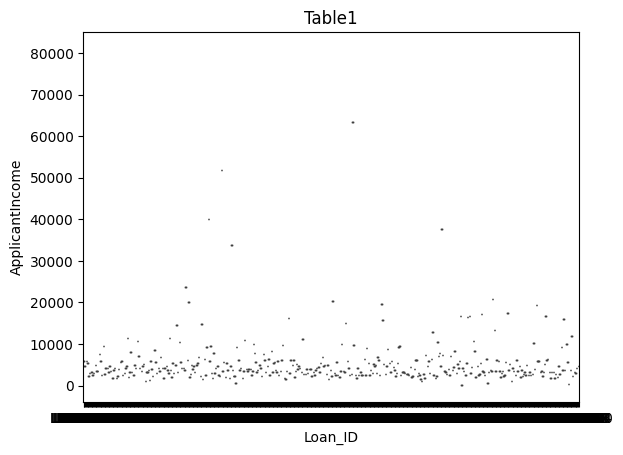

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Loan_ID', y='ApplicantIncome', data=df)
plt.title('Table1')
plt.xlabel('Loan_ID')
plt.ylabel('ApplicantIncome')
plt.show()



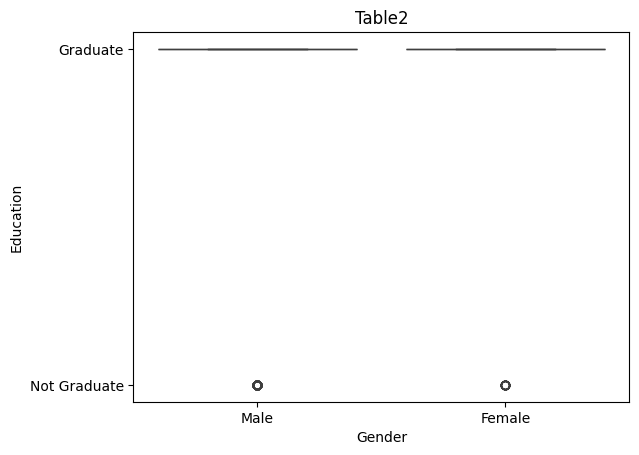

In [38]:
sns.boxplot(x='Gender', y='Education', data=df)
plt.title('Table2')
plt.xlabel('Gender')
plt.ylabel('Education')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [40]:
from scipy.stats import ttest_1samp,ttest_ind


selected_column = 'ApplicantIncome'
specified_value = 50 

t_statistic, p_value = ttest_1samp(df[selected_column], specified_value)

alpha = 0.05 
if p_value < alpha:
    print(f"We can say that the mean of '{selected_column}' is not equal to {specified_value}.")
else:
    print(f"There is not enough information to say that the mean of '{selected_column}' is different from {specified_value}.")


We can say that the mean of 'ApplicantIncome' is not equal to 50.


In [41]:
column1 = 'ApplicantIncome'
column2 = 'LoanAmount'

t_statistic, p_value = ttest_ind(df[column1], df[column2])


alpha = 0.05
if p_value < alpha:
    print(f"There is enough information to say that the means of '{column1}' and '{column2}' are not equal.")
else:
    print(f"There is not enough information to say that the means of '{column1}' and '{column2}' are different.")


There is not enough information to say that the means of 'ApplicantIncome' and 'LoanAmount' are different.
